In [20]:
def get_bnc_info(url):
    from urllib.request import urlopen, Request
    import json
    print(url)
    with urlopen(Request(url)) as response:
        return json.loads(response.read()).get("content")


In [21]:
def get_panda_df(data, columns, index):
    import pandas as pd
    df = pd.DataFrame(data=data)[columns]
    df.set_index(index)
    return df

In [22]:
def get_exchange_df():
    return get_panda_df(get_bnc_info("https://api.bravenewcoin.com/v3/exchange"), ['id', 'name', 'url', 'status'], ['id'])


In [23]:
def get_market_df():
    return get_panda_df(get_bnc_info("https://api.bravenewcoin.com/v3/market"), ['id', 'baseAssetId', 'quoteAssetId'], ['id'])


In [24]:
def get_asset_df():
    return get_panda_df(get_bnc_info("https://api.bravenewcoin.com/v3/asset"), ['id', 'name', 'symbol'], ['id'])


In [25]:
def get_ticker_df(exchangeId):
    return get_panda_df(get_bnc_info("https://api.bravenewcoin.com/v3/ticker?exchangeId="+exchangeId), ['id','exchangeId','marketId','last','volume','bid','ask','timestamp'], ['timestamp'])


In [26]:
def get_df():
    
    import pandas as pd
    pd.set_option("display.max_rows", 10)

    exchange_df = get_exchange_df().query('name == \'Dasset\'')
    market_df = get_market_df()
    asset_df = get_asset_df()
    
    print(exchange_df)
    print(exchange_df.loc[exchange_df.index[0], 'id'])
    ticker_df = get_ticker_df(exchange_df.loc[exchange_df.index[0], 'id'])

    market_left_df = pd.merge(market_df, asset_df, left_on='baseAssetId', right_on='id', how='inner')
    market_left_right_df = pd.merge(market_left_df, asset_df, left_on='quoteAssetId', right_on='id', how='inner', suffixes=('_base', '_quote'))
    
    mt_df = pd.merge(market_left_right_df, ticker_df, left_on='id_x', right_on='marketId', how='inner')
    print(mt_df.loc[mt_df.index[0]])
    mt_df['market_name'] = mt_df['name_base'] + '/' + mt_df['symbol_quote']

    result = get_panda_df(mt_df, ['exchangeId', 'marketId', 'market_name', 'baseAssetId', 'quoteAssetId', 'volume', 'last', 'bid', 'ask', 'timestamp'], ['marketId'])
      
    result['volume'] = result['volume'].astype('float64')
    result['last'] = result['last'].astype('float64')
    result['bid'] = result['bid'].astype('float64')
    result['ask'] = result['ask'].astype('float64')
    return result 
    
get_df()


https://api.bravenewcoin.com/v3/exchange
https://api.bravenewcoin.com/v3/market
https://api.bravenewcoin.com/v3/asset
                                       id    name  \
374  5aba92ed-8b7c-45fb-beb7-794a386e0671  Dasset   

                                url  status  
374  https://www.dasset.co.nz/trade  ACTIVE  
5aba92ed-8b7c-45fb-beb7-794a386e0671
https://api.bravenewcoin.com/v3/ticker?exchangeId=5aba92ed-8b7c-45fb-beb7-794a386e0671
id_x            0cbdb223-109a-4ffc-be06-11eee8983fde
baseAssetId     f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f
quoteAssetId    1bc2d21a-c18c-41e7-81d5-e0dafe8c4145
id_y            f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f
name_base                                    Bitcoin
                                ...                 
last                                        10136.91
volume                                       0.22435
bid                                         10153.31
ask                                            10390
timestamp                   2

,exchangeId,marketId,market_name,baseAssetId,quoteAssetId,volume,last,bid,ask,timestamp
0,5aba92ed-8b7c-45fb-beb7-794a386e0671,0cbdb223-109a-4ffc-be06-11eee8983fde,Bitcoin/NZD,f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f,1bc2d21a-c18c-41e7-81d5-e0dafe8c4145,0.22435,10136.910000,10153.310000,10390.000000,2018-10-07T11:18:04.195Z
1,5aba92ed-8b7c-45fb-beb7-794a386e0671,0be2c456-1a36-4d9c-b1f1-b5d739b70c20,Litecoin/NZD,e0c280b3-b4cf-4012-9e08-14a816ef2c9c,1bc2d21a-c18c-41e7-81d5-e0dafe8c4145,0.00000,93.530000,89.510000,94.540000,2018-10-07T11:20:24.064Z
2,5aba92ed-8b7c-45fb-beb7-794a386e0671,f7ba72b6-aec7-451b-ac03-3be081feeee9,Ripple/NZD,e96efbf4-8f71-40bf-9b69-cdc3a6894655,1bc2d21a-c18c-41e7-81d5-e0dafe8c4145,3899.00000,0.685560,0.696620,0.777560,2018-10-07T11:20:22.203Z
3,5aba92ed-8b7c-45fb-beb7-794a386e0671,3895f739-d809-4e9a-8f0c-6e7f332a7525,Bitcoin-Cash/NZD,776b26c5-1f21-411d-b5ef-bc2d757ab03e,1bc2d21a-c18c-41e7-81d5-e0dafe8c4145,0.00000,833.270000,779.060000,814.780000,2018-10-07T11:20:16.845Z
4,5aba92ed-8b7c-45fb-beb7-794a386e0671,f35c7f28-f913-424e-950c-84d8347834cc,EOS/NZD,ab8ac321-082b-4231-a31c-4c938cfceab7,1bc2d21a-c18c-41e7-81d5-e0dafe8c4145,0.00000,8.890000,8.620000,9.240000,2018-10-07T11:18:06.931Z
...,...,...,...,...,...,...,...,...,...,...
12,5aba92ed-8b7c-45fb-beb7-794a386e0671,4c98761d-e1e8-442a-8d44-42263486c005,Ethereum/BTC,e991ba77-d384-48ff-b0a4-40e95ef6b7d6,f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f,0.00000,0.034433,0.032309,0.035712,2018-10-07T11:20:23.298Z
13,5aba92ed-8b7c-45fb-beb7-794a386e0671,cb2ee33d-84b2-462a-9dfa-1ac879e85c1d,Augur/BTC,02058ead-9484-4a3e-8231-d4be34dd8514,f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f,0.00000,0.002180,0.001859,0.001994,2018-10-07T11:20:15.531Z
14,5aba92ed-8b7c-45fb-beb7-794a386e0671,07499b43-e870-4ae1-991e-58bf768b9d16,Storj/BTC,5aa2a20f-912d-477c-80de-627db1e04cfb,f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f,0.00000,0.000060,0.000037,0.000043,2018-10-07T09:10:25.884Z
15,5aba92ed-8b7c-45fb-beb7-794a386e0671,64227b3d-85d6-4a05-9b1f-55199fcbe0f5,Bitcoin/TUSD,f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f,20890afa-1f97-4ea4-b777-675fb128691f,0.00000,6520.250000,6429.290000,6691.810000,2018-10-07T11:18:04.305Z


https://api.bravenewcoin.com/v3/exchange
https://api.bravenewcoin.com/v3/market
https://api.bravenewcoin.com/v3/asset
                                       id    name  \
374  5aba92ed-8b7c-45fb-beb7-794a386e0671  Dasset   

                                url  status  
374  https://www.dasset.co.nz/trade  ACTIVE  
5aba92ed-8b7c-45fb-beb7-794a386e0671
https://api.bravenewcoin.com/v3/ticker?exchangeId=5aba92ed-8b7c-45fb-beb7-794a386e0671
id_x            0cbdb223-109a-4ffc-be06-11eee8983fde
baseAssetId     f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f
quoteAssetId    1bc2d21a-c18c-41e7-81d5-e0dafe8c4145
id_y            f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f
name_base                                    Bitcoin
                                ...                 
last                                        10136.91
volume                                       0.22435
bid                                         10153.31
ask                                            10390
timestamp                   2

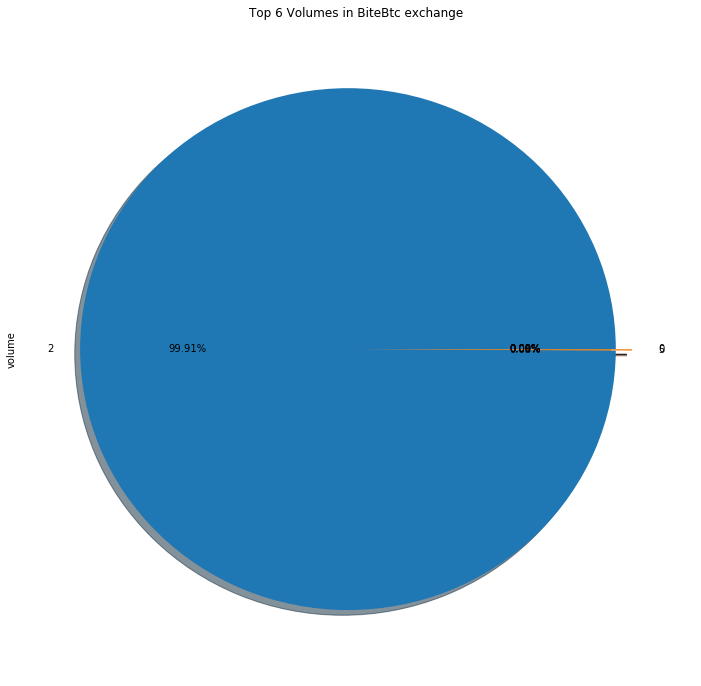

In [19]:
from matplotlib import pyplot as plt
plt.title("Top 6 Volumes in Dasset exchange")
df = get_df()
df = df.sort_values(by="volume", ascending=False)
df[:6]['volume'].plot(kind="pie", explode=[0.03,0.03,0.03,0.03,0.03,0.03], figsize=(12,12), autopct = '%3.2f%%', shadow = True)

https://api.bravenewcoin.com/v3/exchange
https://api.bravenewcoin.com/v3/market
https://api.bravenewcoin.com/v3/asset
                                       id    name  \
374  5aba92ed-8b7c-45fb-beb7-794a386e0671  Dasset   

                                url  status  
374  https://www.dasset.co.nz/trade  ACTIVE  
5aba92ed-8b7c-45fb-beb7-794a386e0671
https://api.bravenewcoin.com/v3/ticker?exchangeId=5aba92ed-8b7c-45fb-beb7-794a386e0671
id_x            0cbdb223-109a-4ffc-be06-11eee8983fde
baseAssetId     f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f
quoteAssetId    1bc2d21a-c18c-41e7-81d5-e0dafe8c4145
id_y            f1ff77b6-3ab4-4719-9ded-2fc7e71cff1f
name_base                                    Bitcoin
                                ...                 
last                                        10136.91
volume                                       0.22435
bid                                         10155.17
ask                                            10390
timestamp                   2

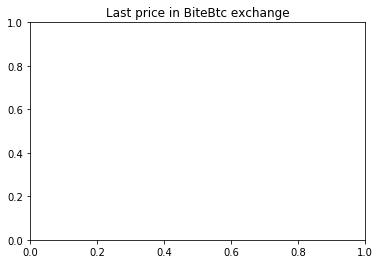

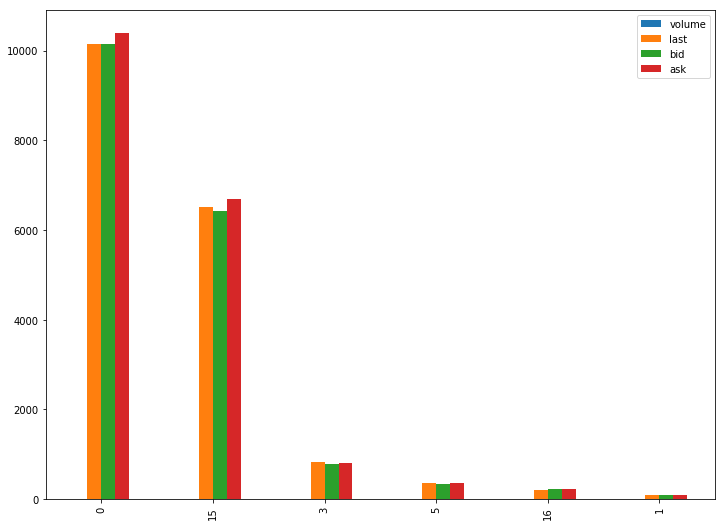

In [27]:
from matplotlib import pyplot as plt
plt.title('Last price in BiteBtc exchange')
df = get_df()
df = df.sort_values(by=['last'], ascending=False)
df = df[df.columns[[0,2,5,6,7,8]]]
df = df[:6]
df.plot(kind='bar', figsize=(12,9))


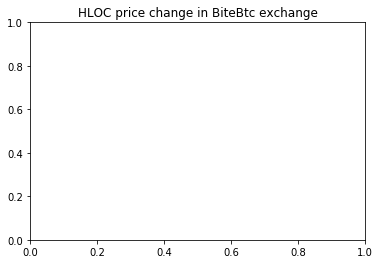

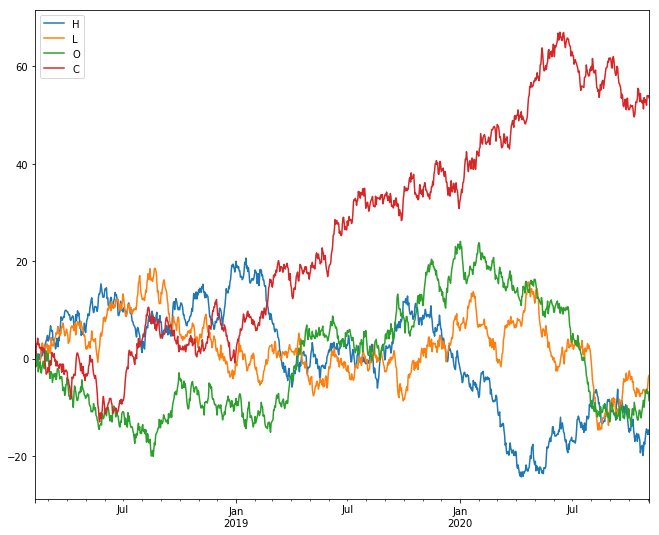

In [16]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
plt.title("HLOC price change in BiteBtc exchange")
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('2/8/2018', periods=1000), columns=['H','L', 'O', 'C'])
df = df.cumsum()
df.plot(figsize=(11,9));